# Simulation of the erosion of the chalk

In [4]:
#bibliothèques nécessaires
import matplotlib.pyplot as plt
from numpy import sin , cos, pi, linspace, sqrt, arange
import numpy as np
#fonctions et classes nécéssaires
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))




In [5]:
""" Constantes à définir """

R = 1    #rayon de la craie
C = 1    #Constante déterminée pour adimensionner l'équation
Phi = 32 #Rayon de la casserole
rho = 1.4  #
N = 26 


def Vlinéaire (n) :
    Omega = (pi/30)* n
    return (Omega * (Phi/2))

/var/folders/tn/bczf20rj627g2s5p80pz8m240000gq/T/ipykernel_4703/2185460191.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


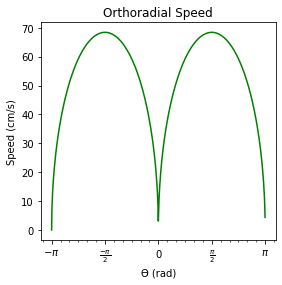

In [6]:
#vitesse orthoradiale définie ici en fonction de theta

def f(theta) :
    F=[]
    for i in range (len(theta)) :
        if (theta[i] < pi and theta[i] > 0) :
            F.append(sqrt(((pi/2)**2)-(theta[i]-(pi/2))**2))
            
        if (theta[i] < 0 and theta[i] > -pi) : 
            F.append(sqrt(((-pi/2)**2)-(theta[i]+(pi/2))**2))
            
        if not (theta[i] < pi and theta[i] > 0) and not (theta[i] < 0 and theta[i] > -pi) :
            F.append(0)
            
    return F

R0 = 1
theta= arange(-pi, pi , 0.01)
Rold = theta*0 + R0


F = f(theta)
Vitesse = []
for i in range (len (F)) : 
    Vitesse.append(F[i]*Vlinéaire(N))
    

plt.plot (theta,Vitesse,color = 'green')
ax = plt.gca()
ax.set_aspect(0.085)
ax.xaxis.set_major_locator(plt.MultipleLocator(pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.title('Orthoradial Speed')
plt.xlabel('\u03F4'' (rad)')
plt.ylabel('Speed (cm/s)')
plt.show()




/var/folders/tn/bczf20rj627g2s5p80pz8m240000gq/T/ipykernel_4703/2185460191.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


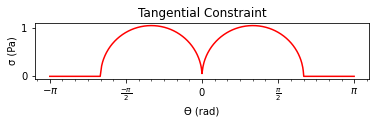

In [7]:
#Contrainte tangentielle en focntion de theta

def tau(theta) : 
    Tau =[]
    for i in range (len(theta)) :
        if (theta[i] < 2*pi/3 and theta[i] > 0) :
            Tau.append(sqrt((((pi/3))**2)-(theta[i]-(pi/3))**2))
            
        if (theta[i] < 0 and theta[i] > -2*pi/3) : 
            Tau.append(sqrt(((-pi/3)**2)-(theta[i]+(pi/3))**2))
            
        if not (theta[i] < 2*pi/3 and theta[i] > 0) and not (theta[i] < 0  and theta[i] > -2*pi/3) :
            Tau.append(0)
    return Tau

      
            
plt.plot (theta,tau(theta),color = 'red')
ax = plt.gca()
ax.set_aspect(1.0)
ax.xaxis.set_major_locator(plt.MultipleLocator(pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.title('Tangential Constraint')
plt.xlabel('\u03F4'' (rad)')
plt.ylabel('\u03C3 (Pa)')
plt.show()


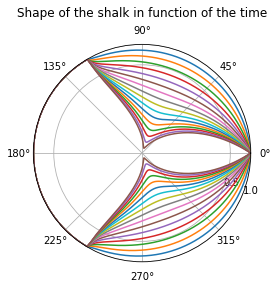

In [8]:
#Tracé de la variation de la coordonnée radiale en fonction de Theta et pour des temps différents

n = 16
dt = 0.1
Rfinal = np.zeros((len(theta),n))

for it in range (n) : 
    
    dR = np.multiply(f(theta),tau(theta))
    Rnew = Rold -dR*dt
    
    Rfinal[:,it] = Rnew
    Rold = Rnew


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for k in range (n) :

    ax.plot(theta, Rfinal[:,k])
    ax.set_rticks([0.5, 1, 1.5, 2]) # Less radial ticks
    ax.set_rmax(1)
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True)
    ax.set_title("Shape of the shalk in function of the time", va='bottom')
plt.show()
    
     

/var/folders/tn/bczf20rj627g2s5p80pz8m240000gq/T/ipykernel_4703/2185460191.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


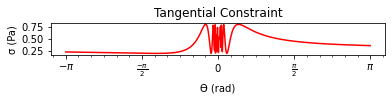

In [37]:
#On remarque qu'il nous faut une fonction qui approche de manière plus lisse Tau


def tau2(theta) : 
    Tau =[]
    for i in range (len(theta)) :
        Tau.append(0.3*sin(((1/theta[i])-0.8))+0.5)
    return Tau

plt.plot (theta,tau2(theta),color = 'red')
ax = plt.gca()
ax.set_aspect(1.0)
ax.xaxis.set_major_locator(plt.MultipleLocator(pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.title('Tangential Constraint')
plt.xlabel('\u03F4'' (rad)')
plt.ylabel('\u03C3 (Pa)')
plt.show()

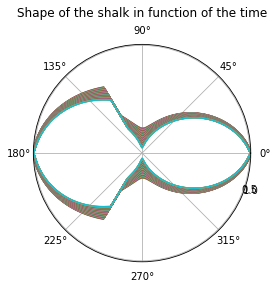

In [25]:
n = 80
dt = 0.1
Rfinal = np.zeros((len(theta),n))

for it in range (n) : 
    
    dR = np.multiply(f(theta),tau2(theta))
    Rnew = Rold -dR*dt
    
    Rfinal[:,it] = Rnew
    Rold = Rnew


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for k in range (n) :

    ax.plot(theta, Rfinal[:,k])
    ax.set_rticks([0.5, 1, 1.5, 2]) # Less radial ticks
    ax.set_rmax(1)
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True)
    ax.set_title("Shape of the shalk in function of the time", va='bottom')
plt.show()
    